In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [18]:
lidar = np.loadtxt('lidar.txt', dtype=int)
ndsi = np.loadtxt('ndsi.txt', dtype=int)

Sentinel
[[6249841  213953]
 [ 682575 1249962]]


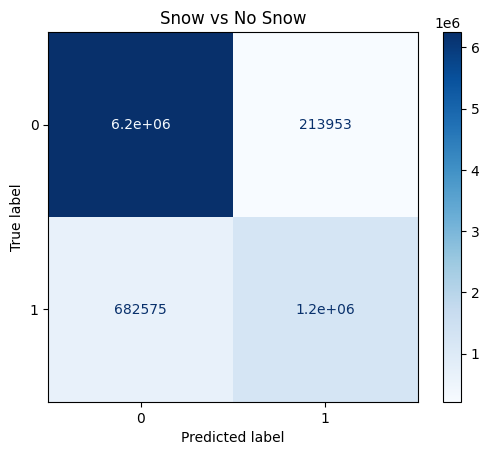

In [19]:
print("Sentinel")

# cm = confusion_matrix(lidar, ndsi)
disp = ConfusionMatrixDisplay.from_predictions(
    lidar,
    ndsi,
    labels=[0, 1],
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Snow vs No Snow")

print(disp.confusion_matrix)

plt.show()

In [20]:
def scores(confusion_matrix):
    # confusion_matrix[0, 0]: True negatives
    # confusion_matrix[0, 1]: False positives
    # confusion_matrix[1, 0]: False negatives
    # confusion_matrix[1, 1]: True positives

    TN, FP, FN, TP = confusion_matrix.ravel()

    # Calculate precision and recall
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)

    # Calculate F1 score
    f1_score = 2 * (precision * recall) / (precision + recall)

    return precision, recall, f1_score

# Calculate F1 score
precision, recall, f1_score = scores(disp.confusion_matrix)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Precision: 0.853848754879894
Recall: 0.6467984830303378
F1 Score: 0.7360398439312553


In [21]:
def cm(truth, pred):
    t = np.loadtxt(f'{truth}.txt', dtype=int)
    p = np.loadtxt(f'{pred}.txt', dtype=int)
    disp = ConfusionMatrixDisplay.from_predictions(
        t,
        p,
        labels=[0, 1],
        cmap=plt.cm.Blues,
        normalize=None,
    )
    disp.ax_.set_title("Snow vs No Snow")

    print(disp.confusion_matrix)

    plt.show()

    precision, recall, f1_score = scores(disp.confusion_matrix)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")

[[248235  13642]
 [ 10440  68745]]


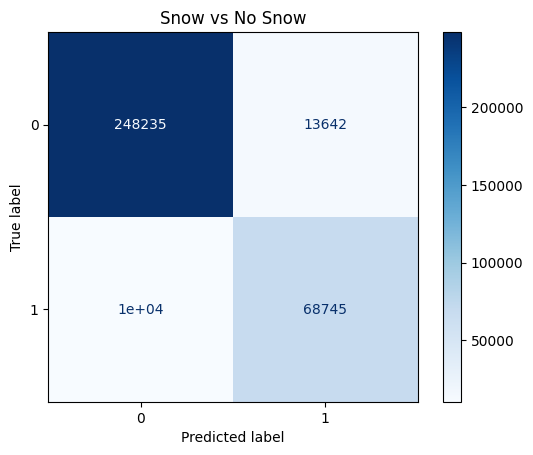

Precision: 0.834415623824147
Recall: 0.8681568478878575
F1 Score: 0.8509518976060209


In [22]:
cm("y_train", "y_pred_train")

[[5948842  341798]
 [ 268223 1626634]]


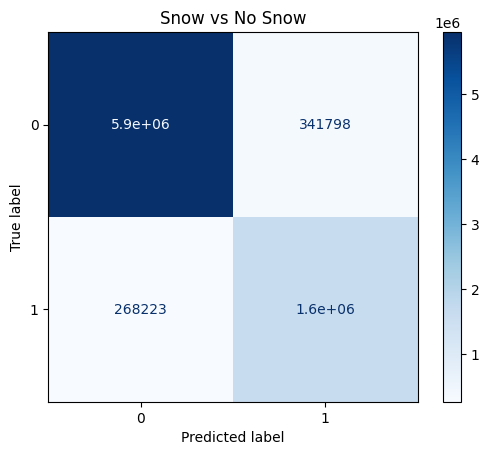

Precision: 0.8263602705097255
Recall: 0.858446837940805
F1 Score: 0.8420980154474594


In [23]:
cm("y_test", "y_pred")

[[1441105  424779]
 [  99527  597369]]


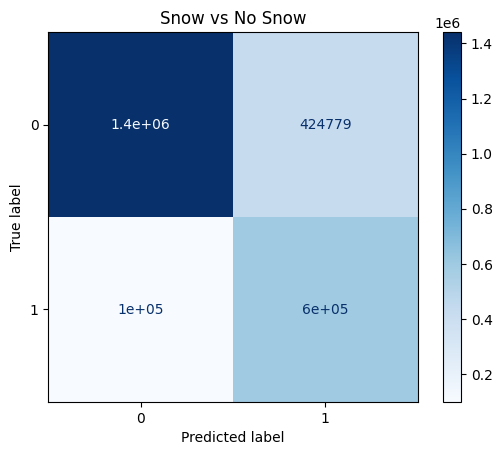

Precision: 0.5844251517392784
Recall: 0.8571852902011204
F1 Score: 0.6950014077591964


In [24]:
cm("y", "Y_pred (1)")